## Wrangling pet license data 

### Goals of the Task


Each row in the pet license data set is a pet in the Seattle area, with the zipcode. 
The aim of this task is to reshape and filter the data table into a summary of the number of dogs registered per zip code. this is potentially interesting data because it tells us about how many people are using bikes to exercise or are more likely to be exercising on foot. 


#### Step 1 : use pandas to read the pet license csv file as a data frame 
- import pandas as pd 
- use pandas read_csv to create a pets data frame
- ensure you are pointing at the correct file path for the data source (you may have to navigate in your notebook!) 


In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
pets = pd.read_csv('data/Seattle_pet_license.csv')

In [209]:
pets

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
0,Ozzy,2005-03-29T00:00:00.000,130651.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98104
1,Jack,2009-12-23T00:00:00.000,898148.0,"Schnauzer, Miniature","Terrier, Rat",Dog,98107
2,Ginger,2006-01-20T00:00:00.000,29654.0,"Retriever, Golden","Retriever, Labrador",Dog,98117
3,Pepper,2006-02-07T00:00:00.000,75432.0,Manx,Mix,Cat,98103
4,Addy,2006-08-04T00:00:00.000,729899.0,"Retriever, Golden",NaN,Dog,98105
...,...,...,...,...,...,...,...
66037,Lily,2016-12-27T00:00:00.000,NaN,Domestic Shorthair,Mix,Cat,98117
66038,Ellie,2016-11-29T00:00:00.000,NaN,German Shepherd,Mix,Dog,98105
66039,Sammy,2016-12-05T00:00:00.000,NaN,Terrier,Maltese,Dog,98105
66040,Buddy,2016-12-06T00:00:00.000,NaN,Bullmastiff,Mix,Dog,98105


In [210]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66042 entries, 0 to 66041
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   animal_s_name       64685 non-null  object 
 1   license_issue_date  66042 non-null  object 
 2   license_number      43885 non-null  float64
 3   primary_breed       66042 non-null  object 
 4   secondary_breed     22538 non-null  object 
 5   species             66042 non-null  object 
 6   zip_code            65884 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.5+ MB


#### Step 2 : drop unnecessary columns 

Remove the the name, license date and breed columns from the dataframe using a slice or selection method. 

Use head() and info() to preview the remaining dataframe 

In [211]:
columns_to_drop = ['animal_s_name', 'license_issue_date', 'primary_breed', 'secondary_breed']
df = pets.drop(columns=columns_to_drop)

In [212]:
df

,license_number,species,zip_code
0,130651.0,Dog,98104
1,898148.0,Dog,98107
2,29654.0,Dog,98117
3,75432.0,Cat,98103
4,729899.0,Dog,98105
...,...,...,...
66037,NaN,Cat,98117
66038,NaN,Dog,98105
66039,NaN,Dog,98105
66040,NaN,Dog,98105


In [213]:
df.head()

,license_number,species,zip_code
0,130651.0,Dog,98104
1,898148.0,Dog,98107
2,29654.0,Dog,98117
3,75432.0,Cat,98103
4,729899.0,Dog,98105


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66042 entries, 0 to 66041
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   license_number  43885 non-null  float64
 1   species         66042 non-null  object 
 2   zip_code        65884 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


#### step 3: filter to dogs only and do some text analysis

- we only want to keep those pets which are dogs (not cats or livestock) so apply any pandas filtering method to keep the rows where species = Dogs
-  the columns animal_s_name and primary_breed contain useful text data. Use any of the text analysis methods you met in week 8 to find out: 
    * what are the 3 most common dog names in seattle?
    * what is the most common dog name for Dachsunds in seattle?



In [215]:
df_dogs = pets[pets['species'] == 'Dog']
df_dogs

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
0,Ozzy,2005-03-29T00:00:00.000,130651.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98104
1,Jack,2009-12-23T00:00:00.000,898148.0,"Schnauzer, Miniature","Terrier, Rat",Dog,98107
2,Ginger,2006-01-20T00:00:00.000,29654.0,"Retriever, Golden","Retriever, Labrador",Dog,98117
4,Addy,2006-08-04T00:00:00.000,729899.0,"Retriever, Golden",NaN,Dog,98105
5,Rustie,2007-07-24T00:00:00.000,437433.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98108
...,...,...,...,...,...,...,...
66031,Bonita,2016-12-22T00:00:00.000,NaN,Beagle,Mix,Dog,98104
66038,Ellie,2016-11-29T00:00:00.000,NaN,German Shepherd,Mix,Dog,98105
66039,Sammy,2016-12-05T00:00:00.000,NaN,Terrier,Maltese,Dog,98105
66040,Buddy,2016-12-06T00:00:00.000,NaN,Bullmastiff,Mix,Dog,98105


In [216]:
top_dog_names = df_dogs.value_counts().sort_values(ascending=False).head(3)
top_dog_names

animal_s_name  license_issue_date       license_number  primary_breed         secondary_breed        species  zip_code
Dolkar         2015-11-19T00:00:00.000  902530.0        Schnauzer, Miniature  Poodle, Miniature      Dog      98133       3
Soozy          2015-11-13T00:00:00.000  959833.0        Terrier, Welsh        Welsh Corgi, Pembroke  Dog      98122       3
Ella           2016-12-20T00:00:00.000  957681.0        Rhodesian Ridgeback   Mix                    Dog      98199       2
dtype: int64

In [217]:
# dachs = df_dogs[df_dogs['primary_breed'].str.contains('Dachshund')]
# dachs_name = dachs.value_counts('animal_s_name').sort_values(ascending=False).head(10)
# dachs_name

dachshund_filter = (df_dogs['primary_breed'].str.contains('Dachshund', case=False, na=False)) | (df_dogs['secondary_breed'].str.contains('Dachshund', case=False, na=False))
df_dachshunds = df_dogs[dachshund_filter]

In [218]:
# Step 4: Filter to keep only Dachshund dogs
dachshund_filter = (
    df_dogs['primary_breed'].str.contains('Dachshund', case=False, na=False).fillna(False) | 
    df_dogs['secondary_breed'].str.contains('Dachshund', case=False, na=False).fillna(False)
)
df_dachshunds = df_dogs[dachshund_filter]

# Update the index
df_dachshunds.reset_index(drop=True, inplace=True)
df_dachshunds.value_counts('animal_s_name').sort_values(ascending=False).head(5).reset_index()

,animal_s_name,0
0,Charlie,18
1,Oscar,16
2,Lucy,14
3,Bella,13
4,Frankie,10


In [219]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43076 entries, 0 to 66041
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   animal_s_name       42858 non-null  object 
 1   license_issue_date  43076 non-null  object 
 2   license_number      28042 non-null  float64
 3   primary_breed       43076 non-null  object 
 4   secondary_breed     17794 non-null  object 
 5   species             43076 non-null  object 
 6   zip_code            42967 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


#### step 4: filter to dogs in relevant zipcodes 

- drop any rows from your data frame which dont have zipcodes
- now, drop any rows that are linked to zipcodes which are either invalid or dont match the zipcodes in the Seattle cycle trip data - you can use the reference list below:


98109
98102
98121
98101
98122
98112
98104
98105

- remember to update the index of your data frame after dropping rows 

In [220]:
dropped_pets = df_dogs.dropna(subset=['zip_code'])
dropped_pets


,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
0,Ozzy,2005-03-29T00:00:00.000,130651.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98104
1,Jack,2009-12-23T00:00:00.000,898148.0,"Schnauzer, Miniature","Terrier, Rat",Dog,98107
2,Ginger,2006-01-20T00:00:00.000,29654.0,"Retriever, Golden","Retriever, Labrador",Dog,98117
4,Addy,2006-08-04T00:00:00.000,729899.0,"Retriever, Golden",NaN,Dog,98105
5,Rustie,2007-07-24T00:00:00.000,437433.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98108
...,...,...,...,...,...,...,...
66031,Bonita,2016-12-22T00:00:00.000,NaN,Beagle,Mix,Dog,98104
66038,Ellie,2016-11-29T00:00:00.000,NaN,German Shepherd,Mix,Dog,98105
66039,Sammy,2016-12-05T00:00:00.000,NaN,Terrier,Maltese,Dog,98105
66040,Buddy,2016-12-06T00:00:00.000,NaN,Bullmastiff,Mix,Dog,98105


In [221]:
invalid_zip = ['98109', '98102', '98121', '98101', '98122', '98112', '98104', '98105']
valid_zip_dogs = dropped_pets[~dropped_pets['zip_code'].isin(invalid_zip)]
valid_zip_dogs

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
1,Jack,2009-12-23T00:00:00.000,898148.0,"Schnauzer, Miniature","Terrier, Rat",Dog,98107
2,Ginger,2006-01-20T00:00:00.000,29654.0,"Retriever, Golden","Retriever, Labrador",Dog,98117
5,Rustie,2007-07-24T00:00:00.000,437433.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98108
9,Sampson,2008-01-31T00:00:00.000,26600.0,Shepherd,Siberian Husky,Dog,98106
10,Buddy,2008-03-20T00:00:00.000,135598.0,"Retriever, Labrador",Mix,Dog,98133
...,...,...,...,...,...,...,...
66016,Buddy,2016-12-30T00:00:00.000,NaN,"Terrier, Russell",NaN,Dog,98177
66022,Juno,2016-12-30T00:00:00.000,NaN,Shepherd,NaN,Dog,98144
66025,Piper,2016-12-30T00:00:00.000,NaN,Mastiff,Cane Corso,Dog,98115
66026,Boomer,2016-12-11T00:00:00.000,NaN,"Poodle, Standard",Mix,Dog,98118


In [222]:
valid_zip_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33231 entries, 1 to 66041
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   animal_s_name       33052 non-null  object 
 1   license_issue_date  33231 non-null  object 
 2   license_number      22256 non-null  float64
 3   primary_breed       33231 non-null  object 
 4   secondary_breed     13820 non-null  object 
 5   species             33231 non-null  object 
 6   zip_code            33231 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.0+ MB


#### step 4: total up the dog licenses by zipcode 

- using the group by pandas method on your data frame
- summarise the number of dogs per relevant zipcode

In [223]:
# did not remove licenses as license issue date was present for all rows so assumed 
# each dog does have a license even though Nan values present in licenses
total_dog_licenses = valid_zip_dogs[['zip_code', 'species']].groupby('zip_code').count().sort_values('species', ascending=False).reset_index()


#### Step 5: validate the data
- use EDA techniques including visualisation to validate the aggregation from the previous step 

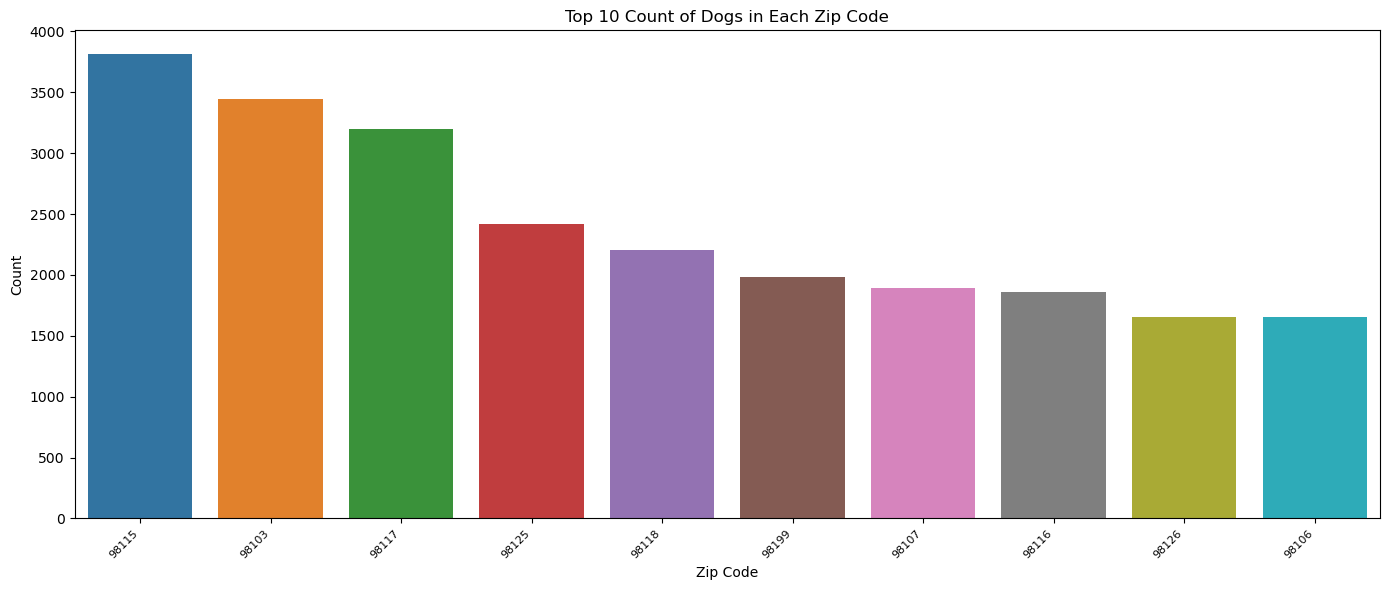

In [224]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='zip_code', data=valid_zip_dogs, order=valid_zip_dogs['zip_code'].value_counts().head(10).index)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust other parameters if needed
ax.tick_params(axis="x", labelsize=8)

plt.title('Top 10 Count of Dogs in Each Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

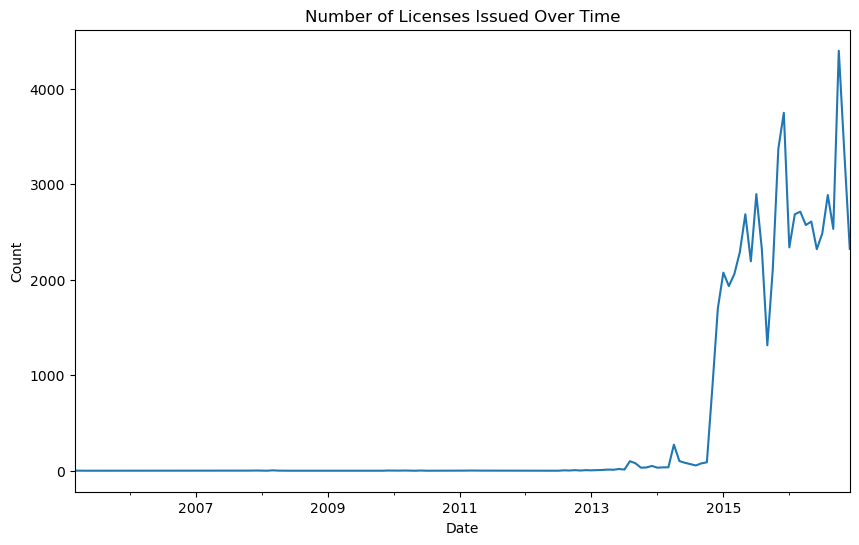

In [232]:
pets['license_issue_date'] = pd.to_datetime(pets['license_issue_date'])
plt.figure(figsize=(10, 6))
pets.set_index('license_issue_date').resample('M').size().plot()
plt.title('Number of Licenses Issued Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

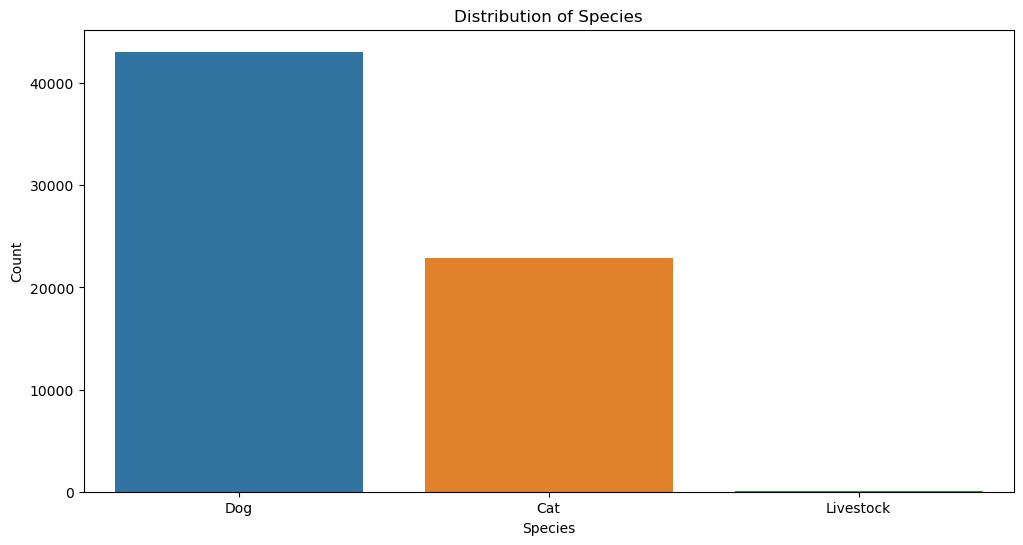

In [230]:
plt.figure(figsize=(12, 6))
sns.countplot(x='species', data=pets)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

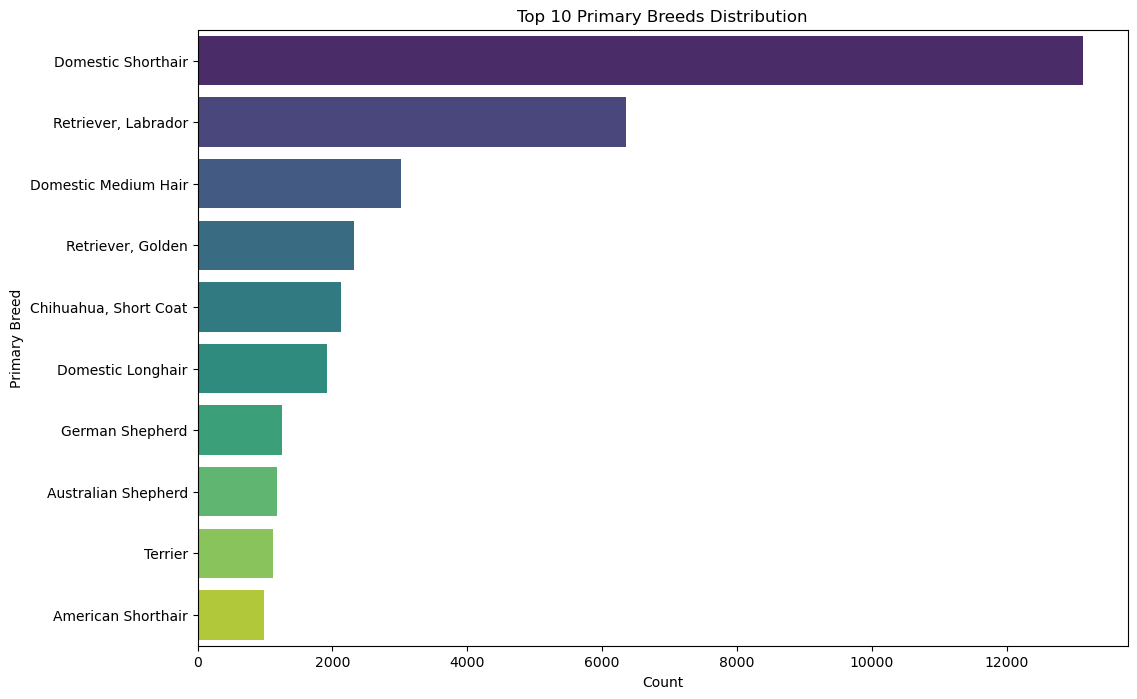

In [227]:
top_primary_breeds = pets['primary_breed'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_primary_breeds.index, x=top_primary_breeds.values, palette='viridis')
plt.title('Top 10 Primary Breeds Distribution')
plt.xlabel('Count')
plt.ylabel('Primary Breed')
plt.show()

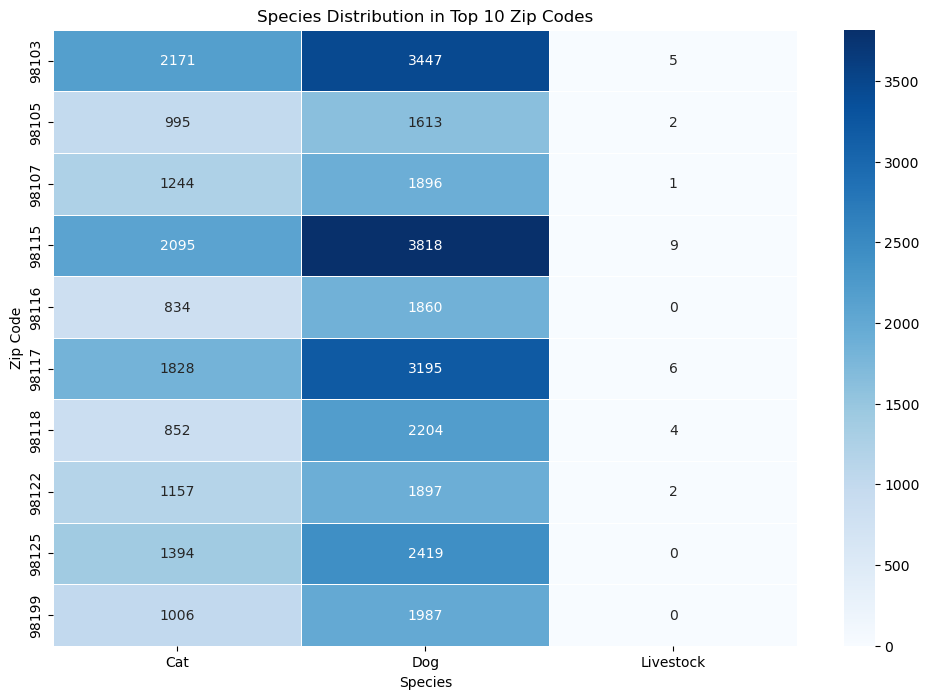

In [229]:
top_zip_codes = pets['zip_code'].value_counts().head(10).index
subset_data = pets[pets['zip_code'].isin(top_zip_codes)]

plt.figure(figsize=(12, 8))
heatmap_data_zipcodes_top10 = subset_data.groupby(['zip_code', 'species']).size().unstack(fill_value=0)

sns.heatmap(heatmap_data_zipcodes_top10, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Species Distribution in Top 10 Zip Codes')
plt.xlabel('Species')
plt.ylabel('Zip Code')
plt.show()
